# Gradient Descent Implementation Challenge!!

## Use gradient descent to find the optimal parameters of a **multiple** regression model. (We only showed an implementation for a bivariate model during lecture.)

A note: Implementing gradient descent in any context is not trivial, particularly the step where we calculate the gradient will change based on the number of parameters that we're trying to optimize for. You will need to research what the gradient of a multiple regression model looks like. This challenge is pretty open-ended but I hope it will be thrilling. Please work together, help each other, share resources and generally expand your understanding of gradient descent as you try and achieve this implementation. 

## Suggestions:

Start off with a model that has just two $X$ variables You can use any datasets that have at least two x variables. Potential candidates might be the blood pressure dataset that we used during lecture on Monday: [HERE](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr02.xls) or any of the housing datasets. You would just need to select from them the two varaibles $x$ variables and one y variable that you want to work with that you most want to work with. 

Use Sklearn to find the optimal parameters of your model first. (like we did during the lecture.) So that you can compare the parameter estimates of your gradient-descent linear regression to the estimates of OLS linear regression. If implemented correctly they should be nearly identical.

Becoming a Data Scientist is all about striking out into the unknown, getting stuck and then researching and fighting and learning until you get yourself unstuck. Work together! And fight to take your own learning-rate fueled step towards your own optimal understanding of gradient descent! 


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## Linear Regression on the Boston Housing Dataset

In [78]:
##### Make it Hap'n Cap'n #####

# http://lib.stat.cmu.edu/datasets/boston
import pandas as pd
from sklearn.datasets import load_boston

boston_dataset = load_boston()

df = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
df['MEDV'] = boston_dataset.target

print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [79]:
X = pd.concat([df['LSTAT'], df['AGE']], axis=1)
X = X.values

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X))

X_scaled.head()

,0,1
0,-1.075562,-0.120013
1,-0.492439,0.367166
2,-1.208727,-0.265812
3,-1.361517,-0.809889
4,-1.026501,-0.511180


In [94]:
from sklearn.model_selection import train_test_split

y = df['MEDV'].values

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=.5, random_state=42)

print(X_scaled.shape, "\n")

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

X_train

(506, 2) 

(253, 2)
(253, 2)
(253,)
(253,)


,0,1
475,1.604560,1.025037
299,-1.109204,-2.082957
296,-0.737743,-0.624974
198,-0.845677,-1.076593
377,1.203663,1.074822
146,0.560266,1.117494
396,0.941538,0.975252
147,2.365704,0.964584
428,1.242912,0.338718
289,-0.440575,-1.624226


In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, Y_train)

print("Coefficient: \n", model.coef_)
print("\n Intercept: ", model.intercept_)

Coefficient: 
 [-7.46632144  0.7795793 ]

 Intercept:  22.66111931516525


In [96]:
y_test_predict = model.predict(X_test)

MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))

MSE is 37.72880073910995
RMSE is 6.142377450068495
R^2 is 0.5349602152243154


## Gradient Descent on the Boston Housing Dataset

In [103]:
# setting the matrixes
# X and y already defined in cells above
y = y.reshape(-1,1)  # reshaping y into vector to eventually substract y_hat

# theta is the starting point of the equation - randomly chosen in this case
theta = np.array([0,0,0]).reshape(3,-1)
print(f'theta: \n{theta}\n')
print(f'theta shape: \n{theta.shape}\n')
print(f'y:\n{y}')

theta: 
[[0]
 [0]
 [0]]

theta shape: 
(3, 1)

y:
[[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]
 [28.7]
 [22.9]
 [27.1]
 [16.5]
 [18.9]
 [15. ]
 [18.9]
 [21.7]
 [20.4]
 [18.2]
 [19.9]
 [23.1]
 [17.5]
 [20.2]
 [18.2]
 [13.6]
 [19.6]
 [15.2]
 [14.5]
 [15.6]
 [13.9]
 [16.6]
 [14.8]
 [18.4]
 [21. ]
 [12.7]
 [14.5]
 [13.2]
 [13.1]
 [13.5]
 [18.9]
 [20. ]
 [21. ]
 [24.7]
 [30.8]
 [34.9]
 [26.6]
 [25.3]
 [24.7]
 [21.2]
 [19.3]
 [20. ]
 [16.6]
 [14.4]
 [19.4]
 [19.7]
 [20.5]
 [25. ]
 [23.4]
 [18.9]
 [35.4]
 [24.7]
 [31.6]
 [23.3]
 [19.6]
 [18.7]
 [16. ]
 [22.2]
 [25. ]
 [33. ]
 [23.5]
 [19.4]
 [22. ]
 [17.4]
 [20.9]
 [24.2]
 [21.7]
 [22.8]
 [23.4]
 [24.1]
 [21.4]
 [20. ]
 [20.8]
 [21.2]
 [20.3]
 [28. ]
 [23.9]
 [24.8]
 [22.9]
 [23.9]
 [26.6]
 [22.5]
 [22.2]
 [23.6]
 [28.7]
 [22.6]
 [22. ]
 [22.9]
 [25. ]
 [20.6]
 [28.4]
 [21.4]
 [38.7]
 [43.8]
 [33.2]
 [27.5]
 [26.5]
 [18.6]
 [19.3]
 [20.1]
 [19.5]
 [19.5]
 [20.4]
 [19.8]
 [19.4]
 [21.7]
 [22.8]
 [18.8]
 [18.7]
 [18.5]
 [18.3]
 [21.2]
 [19.2]
 [20.4

In [104]:
# Make sure X is normalized (already normalized in Regression)
# Add column of 1s at the beginning of X_scaled
# This will allow us to multiply it by beta_0

# np.c_ cocatenates tow arrays along columns and creates a vector with same
# length as the rows in X_scaled 
X_linalg = np.c_[np.ones(X_scaled.shape[0]), X_scaled]
print(f'X_linalg: \n{X_linalg}')

X_linalg: 
[[ 1.         -1.0755623  -0.12001342]
 [ 1.         -0.49243937  0.36716642]
 [ 1.         -1.2087274  -0.26581176]
 ...
 [ 1.         -0.98304761  0.79744934]
 [ 1.         -0.86530163  0.73699637]
 [ 1.         -0.66905833  0.43473151]]


In [106]:
# Make predictions (y_hat) for rows (datapoints) in X_linalg
# Result of multiplying all terms by the regression equation coefficients in theta
# and adding the products... Calculated with dot product
y_hat = np.dot(X_linalg, theta)
print(f'y_hat:\n{y_hat}')

y_hat:
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0

If we use 0.5* Mean Square Error as our cost function, as described [here](https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html#id3), then the formula for the gradient at any given point is given by:

$gradient = (-X*(errors))/N$

where

$errors = targets-predictions = y - \hat{y}$ 

$N$ is the number of datapoints, and we're taking the dot product.

In [107]:
# The error comes from subtracting the actual y values from our 
# predictions (y_hat). y was reshaped earlier so that the
# subtraction happened elementwise.
errors = y_hat - y
print(f'errors: \n{errors}')

errors: 
[[-24. ]
 [-21.6]
 [-34.7]
 [-33.4]
 [-36.2]
 [-28.7]
 [-22.9]
 [-27.1]
 [-16.5]
 [-18.9]
 [-15. ]
 [-18.9]
 [-21.7]
 [-20.4]
 [-18.2]
 [-19.9]
 [-23.1]
 [-17.5]
 [-20.2]
 [-18.2]
 [-13.6]
 [-19.6]
 [-15.2]
 [-14.5]
 [-15.6]
 [-13.9]
 [-16.6]
 [-14.8]
 [-18.4]
 [-21. ]
 [-12.7]
 [-14.5]
 [-13.2]
 [-13.1]
 [-13.5]
 [-18.9]
 [-20. ]
 [-21. ]
 [-24.7]
 [-30.8]
 [-34.9]
 [-26.6]
 [-25.3]
 [-24.7]
 [-21.2]
 [-19.3]
 [-20. ]
 [-16.6]
 [-14.4]
 [-19.4]
 [-19.7]
 [-20.5]
 [-25. ]
 [-23.4]
 [-18.9]
 [-35.4]
 [-24.7]
 [-31.6]
 [-23.3]
 [-19.6]
 [-18.7]
 [-16. ]
 [-22.2]
 [-25. ]
 [-33. ]
 [-23.5]
 [-19.4]
 [-22. ]
 [-17.4]
 [-20.9]
 [-24.2]
 [-21.7]
 [-22.8]
 [-23.4]
 [-24.1]
 [-21.4]
 [-20. ]
 [-20.8]
 [-21.2]
 [-20.3]
 [-28. ]
 [-23.9]
 [-24.8]
 [-22.9]
 [-23.9]
 [-26.6]
 [-22.5]
 [-22.2]
 [-23.6]
 [-28.7]
 [-22.6]
 [-22. ]
 [-22.9]
 [-25. ]
 [-20.6]
 [-28.4]
 [-21.4]
 [-38.7]
 [-43.8]
 [-33.2]
 [-27.5]
 [-26.5]
 [-18.6]
 [-19.3]
 [-20.1]
 [-19.5]
 [-19.5]
 [-20.4]
 [-19.8]
 [-19.4]
 

$gradient = (-X*(errors))/N$

In [108]:
gradient = np.dot(X_linalg.T, errors) / len(y)
gradient

array([[-22.53280632],
       [  6.77765364],
       [  3.4634629 ]])

In [109]:
# Once we have the gradient, we UPDATE theta by subtracting the gradient
# times the learning rate (alpha)
alpha = 0.001
theta = theta - alpha*gradient
theta

array([[ 0.02253281],
       [-0.00677765],
       [-0.00346346]])

## Gradient Descent as a function

In [0]:
def gradient_descent(X, y, theta, iterations, alpha):
    """
    Implements gradient descent
    
    X = array of variables
    y = array of results
    theta = initial guess for vector of coefficents theta
    iterations = number of steps to take in descent
    alpha = learning rate for each step
    """
    past_costs = []
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_linalg = np.c_[np.ones(X_scaled.shape[0]), X_scaled]
    n = len(y)
    
    for _ in range(iterations):
        y_hat = np.dot(X_linalg, theta)
        errors = y_hat - y
        cost = 1/(2*n) * np.dot(errors.T, errors)
        past_costs.append(cost)
        gradient = np.dot(X_linalg.T, errors) / n
        theta = theta - alpha*gradient
    return theta, y_hat, past_costs

In [0]:
# Applying Gradient Descent function to df
X = (pd.concat([df['LSTAT'], df['AGE']], axis=1)).values
y = y = df['MEDV'].values.reshape(-1,1)
iterations = 2000
alpha = 0.01
theta = np.array([0,0,0]).reshape(3,-1)

In [143]:
theta_new, y_hat, costs = gradient_descent(X, y, theta, iterations, alpha)

print(f'theta_new:\n{theta_new}\n')
print(f'y_hat:\n{y_hat}\n')
print(f'y (for comparison):\n{y}')

theta_new:
[[22.53280628]
 [-7.36133703]
 [ 0.96998067]]

y_hat:
[[30.33396671]
 [26.5139578 ]
 [31.17281834]
 [31.76981111]
 [29.59339224]
 [29.872434  ]
 [22.69485758]
 [16.77825983]
 [ 5.78927024]
 [18.54175723]
 [15.37474733]
 [22.3903241 ]
 [18.35833522]
 [26.83217162]
 [25.5514283 ]
 [26.43266766]
 [27.44468789]
 [20.90432074]
 [22.42365229]
 [23.98153239]
 [14.91765678]
 [22.02978436]
 [17.07019347]
 [16.15952007]
 [19.65009122]
 [19.14365939]
 [21.05649817]
 [18.45605071]
 [23.27196887]
 [23.87319939]
 [13.1493376 ]
 [23.21748115]
 [ 7.45914046]
 [17.56581021]
 [15.57793399]
 [25.58767672]
 [23.56799767]
 [25.60571503]
 [23.81260839]
 [29.5180078 ]
 [31.72561625]
 [28.32952255]
 [27.45623646]
 [25.77084615]
 [24.74912052]
 [23.85423344]
 [19.77143633]
 [16.77378847]
 [ 4.719112  ]
 [18.6460569 ]
 [20.92145378]
 [25.66628024]
 [28.50327176]
 [25.26324281]
 [19.59397159]
 [29.01584291]
 [28.50125339]
 [30.54481462]
 [27.15231622]
 [25.3379848 ]
 [21.93811717]
 [21.54521634]
 [28.

In [149]:
# Calculating Sum of Squared Errors/Residuals (SSE)
# This is pretty much ZERO! We've reached minimum!!
SSE = sum(y - y_hat)**2
SSE

array([4.60722653e-10])

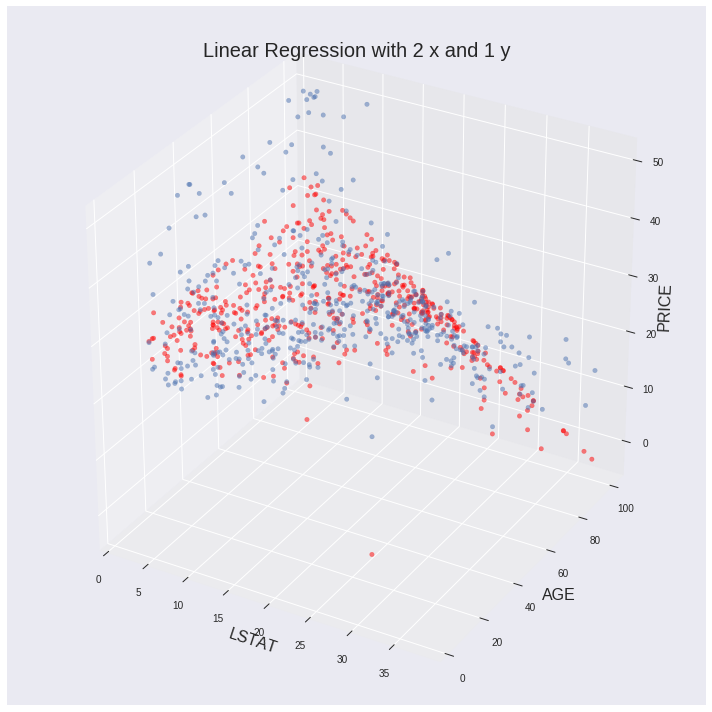

In [144]:
### Plotting
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Plot datapoints
ax.scatter(X[:,0], X[:,1], y, alpha=0.5);
ax.scatter(X[:,0], X[:,1], y_hat, alpha=0.5, color='r');

# Add labels
ax.set_xlabel('LSTAT', fontsize=16)
ax.set_ylabel('AGE', fontsize=16)
ax.set_zlabel('PRICE', fontsize=16)
ax.set_title('Linear Regression with 2 x and 1 y', fontsize=20);

plt.tight_layout()

In [0]:
costs

[array([[296.0734585]]),
 array([[295.50809594]]),
 array([[294.94391998]]),
 array([[294.38092803]]),
 array([[293.81911755]]),
 array([[293.25848597]]),
 array([[292.69903073]]),
 array([[292.14074931]]),
 array([[291.58363915]]),
 array([[291.02769772]]),
 array([[290.47292249]]),
 array([[289.91931094]]),
 array([[289.36686056]]),
 array([[288.81556882]]),
 array([[288.26543323]]),
 array([[287.71645129]]),
 array([[287.1686205]]),
 array([[286.62193837]]),
 array([[286.07640242]]),
 array([[285.53201017]]),
 array([[284.98875915]]),
 array([[284.44664689]]),
 array([[283.90567093]]),
 array([[283.36582881]]),
 array([[282.82711809]]),
 array([[282.28953632]]),
 array([[281.75308107]]),
 array([[281.21774988]]),
 array([[280.68354035]]),
 array([[280.15045005]]),
 array([[279.61847655]]),
 array([[279.08761746]]),
 array([[278.55787035]]),
 array([[278.02923283]]),
 array([[277.50170251]]),
 array([[276.97527699]]),
 array([[276.44995389]]),
 array([[275.92573083]]),
 array([[275.4

## Cost by iterations

In [0]:
# Show cost decreasing with additional iterations
plt.title('Cost per Iteration')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(costs)
plt.show()

## Stretch Goals

If you happen upon the most useful resources for accomplishing this challenge first, I want you to spend time today studying other variations of Gradient Descent-Based Optimizers.

- Try and write a function that can perform gradient descent for arbitarily large (in dimensionality) multiple regression models. 
- Create a notebook for yourself exploring these topics
- How do they differ from the "vanilla" gradient descent we explored today
- How do these different gradient descent-based optimizers seek to overcome the challenge of finding the global minimum among various local minima?
- Write a blog post that reteaches what you have learned about these other gradient descent-based optimizers.

[Overview of GD-based optimizers](http://ruder.io/optimizing-gradient-descent/)

[Siraj Raval - Evolution of Gradient Descent-Based Optimizers](https://youtu.be/nhqo0u1a6fw)